In [62]:
# Slide 11:

heptathlon<-read.csv2("../Data/heptathlon_copy.csv")


heptathlon2<-heptathlon[,-(1:2)]

In [63]:
# Slide 13:
library(psych)

# Correlation matrix
R<-cor(heptathlon2)

# squared multiple correlation coefficients

smc<-numeric(7)
for(i in 1:7){
  smc[i]<- R[i,-i]%*%solve(R[-i,-i])%*%R[-i,i]
  }
smc

# Construction of V matrix
V<-R
diag(V)<-smc

[1] 0.9108174 0.8140824 0.6881388 0.8192189 0.9151310 0.4128242 0.6152957

Using:
$$
\rho_{i|1, 1-1, 1+1, k}^2 = \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21}
$$

In [64]:
# Slide 14:
principal(cor(heptathlon2),nfactors = 3,rotate = "none")$loadings[,]

principal(V,nfactors = 3,rotate = "none")$loadings[,]

,PC1,PC2,PC3
Hurdles,-0.9527330,0.18394262,0.02701241
High.Jump,0.7998971,-0.25979027,-0.29669430
Shot,0.7550672,0.36064144,0.45730099
Run200,-0.8516293,-0.24433641,-0.09159858
Longjump,0.9626588,-0.05003306,0.10251349
Javelin,0.1500479,0.91996733,-0.35422467
Run800,-0.7904642,0.23683966,0.26032215


Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


,PC1,PC2,PC3
Hurdles,-0.9959647,0.24495436,0.037990372
High.Jump,0.8579436,-0.31007568,0.423588642
Shot,0.8734063,0.40661231,-0.003678345
Run200,-0.9309107,-0.28694991,0.241219073
Longjump,1.0075876,-0.07838114,0.006429187
Javelin,0.2358304,0.95223816,0.158935316
Run800,-0.9339401,0.27609909,0.151799610


**Note warning:**\
“Matrix was not positive definite, smoothing was done”

In [65]:
# Slide 15:

eigen(V)$vectors[,1:3]%*%diag(sqrt(eigen(V)$values[1:3]))

principal(V,nfactors = 3,rotate = "none")$loadings[,]

0.9545446,-0.18912611,0.05947206
-0.7848444,0.31255696,0.32566158
-0.7164747,-0.36680153,0.07108174
0.8339174,0.29750117,0.20663545
-0.9651381,0.02517499,0.02657049
-0.1302156,-0.59494431,0.16000578
0.7384005,-0.18720366,0.16781646


Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


,PC1,PC2,PC3
Hurdles,-0.9959647,0.24495436,0.037990372
High.Jump,0.8579436,-0.31007568,0.423588642
Shot,0.8734063,0.40661231,-0.003678345
Run200,-0.9309107,-0.28694991,0.241219073
Longjump,1.0075876,-0.07838114,0.006429187
Javelin,0.2358304,0.95223816,0.158935316
Run800,-0.9339401,0.27609909,0.151799610


**Note warning:**\
“Matrix was not positive definite, smoothing was done”

In [66]:
# Slide 17:

fa3 <- principal(R,nfactors = 3,rotate = "none") 
fa31 <- fa3$loadings[,1:3] 

fa2 <- principal(R,nfactors = 2,rotate = "none") 
fa21 <- fa2$loadings[,1:2] 

fa3ml<-fa(R,nfactors = 3,rotate = "none",scores="regression",fm="ml")
fa3ml.1<-fa3ml$loadings[,1:3]

In [67]:
# rotating:

fa3rot <- principal(R,nfactors = 3,rotate = "varimax") 
fa3rot1 <- fa3rot$loadings[,1:3] 

fa2rot <- principal(R,nfactors = 2,rotate = "varimax") 
fa2rot1 <- fa2rot$loadings[,1:2] 

fa3mlrot<-fa(R,nfactors = 3,rotate = "varimax",
             scores="regression",fm="ml")
fa3mlrot.1<-fa3mlrot$loadings[,1:3]

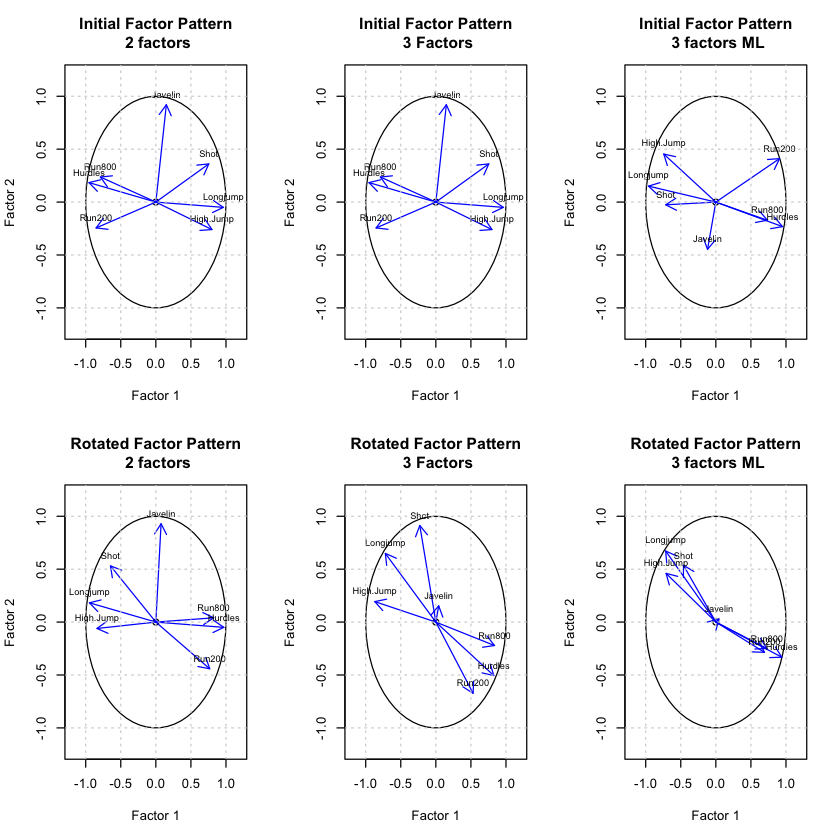

In [68]:
# plot factor structure:


circle = seq(-3.2,3.2,by=0.1) 
# Different combinations of plots 
Names = names(heptathlon2)
plotdata1<-list(fa21,fa31,fa3ml.1)
plotdata2<-list(fa2rot1,fa3rot1,fa3mlrot.1)
my.type<-c("2 factors","3 Factors","3 factors ML")
par(mfrow=c(2,3))
for (i in 1:3){ 
  x<-plotdata1[[i]]
	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",2),
      main = paste("Initial Factor Pattern\n",my.type[i])) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,1],x[,2],length = 0.1,col="blue") 	
      text(x[,1],x[,2]+0.1,Names,cex = 0.7) 
	grid() 
  }
for (i in 1:3){ 
  y<-plotdata2[[i]]

	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",2),
      main = paste("Rotated Factor Pattern\n",my.type[i])) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),y[,1],y[,2],length = 0.1,col="blue") 	
      text(y[,1],y[,2]+0.1,Names,cex = 0.7) 
	grid() 
  }
par(mfrow=c(1,1))

In [69]:
# Slide 20:

temp<- fa(R,nfactors = 3,rotate = "varimax",smc=T,n.obs=25,  
          scores="regression",fm="ml")

A<-temp$loadings[,]
n<-25
k<-7
m<-3

my.Z<-(n-1-(2*k+5)/6-2*m/3)*log(det(A%*%t(A)+diag(temp$uniquenesses))/
                                det(R))
my.Z

1-pchisq(my.Z,df=((k-m)^2-k-m)/2)

[1] 7.900366

[1] 0.04811636

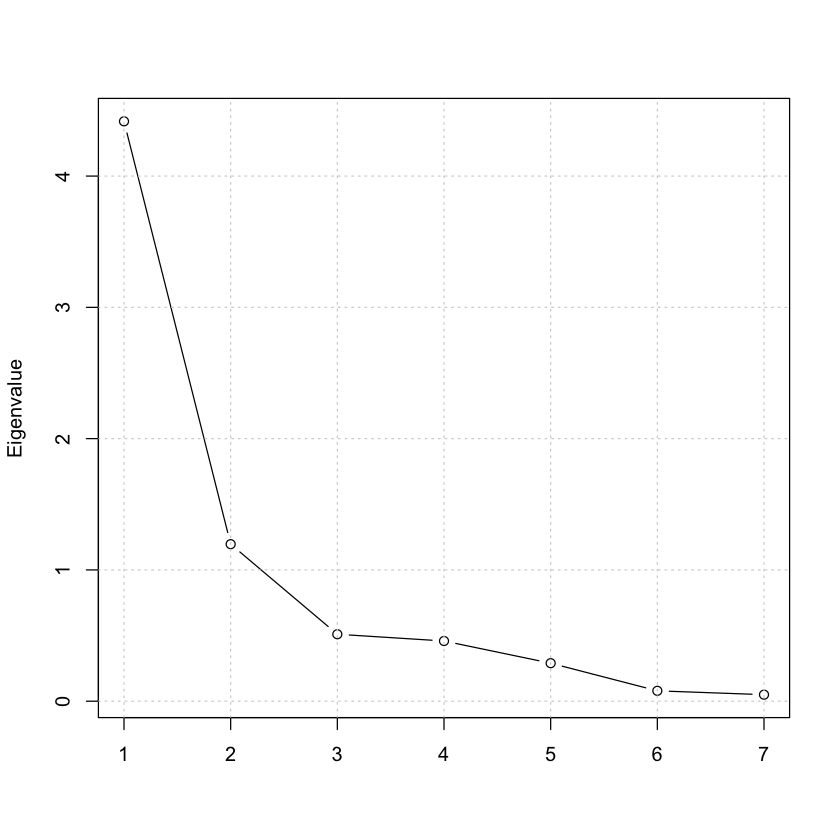

In [70]:
# Slide 22:

plot(eigen(R)$values,xlab='',ylab='Eigenvalue',type="b")
grid()

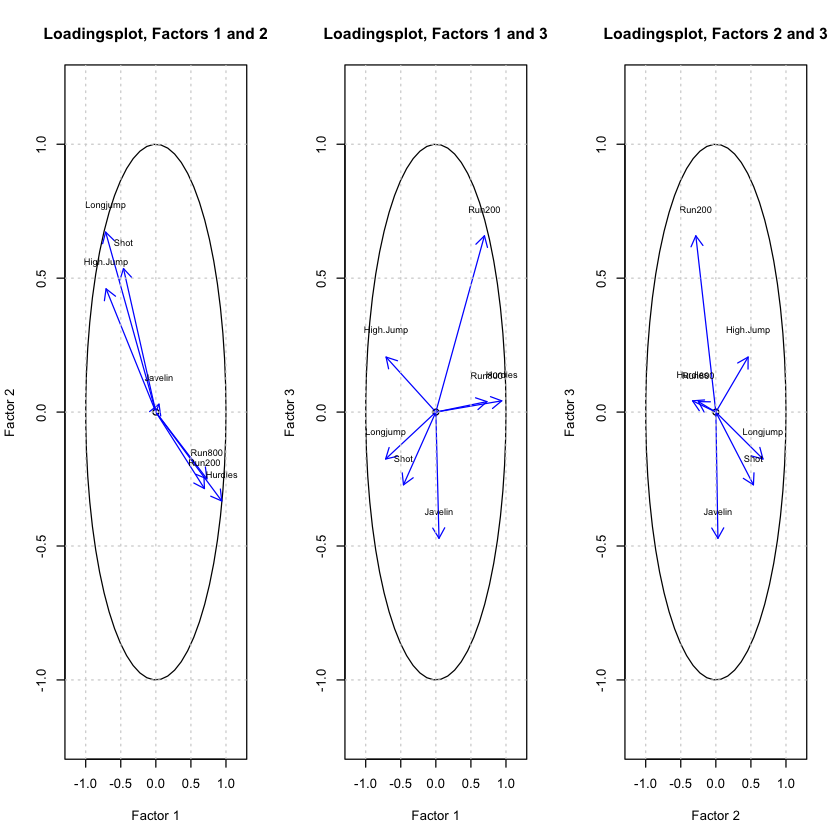

In [71]:
# Slide 23:


par(mfrow=c(1,3))

  x<-temp$loadings[,]
	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",2),
      main = paste("Loadingsplot, Factors 1 and 2")) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,1],x[,2],length = 0.1,col="blue") 	
      text(x[,1],x[,2]+0.1,Names,cex = 0.7) 
	grid() 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",3),
      main = paste("Loadingsplot, Factors 1 and 3")) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,1],x[,3],length = 0.1,col="blue") 	
      text(x[,1],x[,3]+0.1,Names,cex = 0.7) 
	grid() 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",2), 
           ylab = paste0("Factor ",3),
      main = paste("Loadingsplot, Factors 2 and 3")) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,2],x[,3],length = 0.1,col="blue") 	
      text(x[,2],x[,3]+0.1,Names,cex = 0.7) 
	grid() 
par(mfrow=c(1,1))


In [72]:
# Slide 26:

data.frame(Name=heptathlon[,1],  scale(heptathlon2)[,]%*%solve(R)%*%A)

Name,ML1,ML3,ML2
<chr>,<dbl>,<dbl>,<dbl>
"Joyner_Kersee,(USA)",-0.8051687,2.2694725,-1.44028787
"John,(GDR)",-1.2491403,0.4329102,-0.08238012
"Behmer,(GDR)",-0.6699509,0.5876323,-1.44924673
"Choubenkova,(URS)",-0.4789514,-0.1335285,-0.69458387
"Sablovskaite,(URS)",-0.3933279,-0.2766225,-0.83698712
"Schulz,(GDR)",0.0998068,0.7339487,0.20996216
"Fleming,(AUS)",-0.7421209,-0.3391833,-1.00248387
"Greiner,(USA)",-0.0899822,0.9712517,0.24420982
"Lajbnerova,(CZE)",-0.4603487,-0.4069532,0.62882274


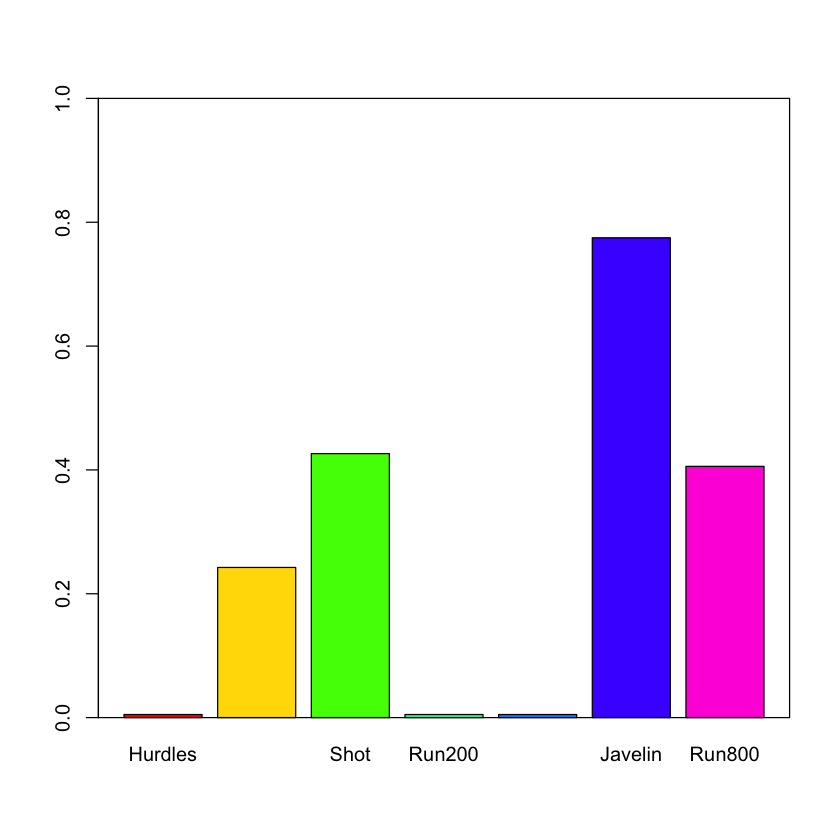

In [73]:
# Slide 27:

barplot(temp$uniquenesses,col=rainbow(7),ylim=c(0,1))
box()

In [74]:
# Slide 43:


frets<-read.csv2("../Data/frets.csv")
head(frets)

,l1,b1,l2,b2
,<int>,<int>,<int>,<int>
1,191,155,179,145
2,195,149,201,152
3,181,148,185,149
4,183,153,188,149
5,176,144,171,142
6,208,157,192,152


In [75]:
# Slide 44
frets2<-scale(frets,center=T,scale=T)
round(cov(frets2),digits=2)

,l1,b1,l2,b2
l1,1.00,0.73,0.71,0.70
b1,0.73,1.00,0.69,0.71
l2,0.71,0.69,1.00,0.84
b2,0.70,0.71,0.84,1.00


,l2,b2
l1,0.71,0.70
b1,0.69,0.71


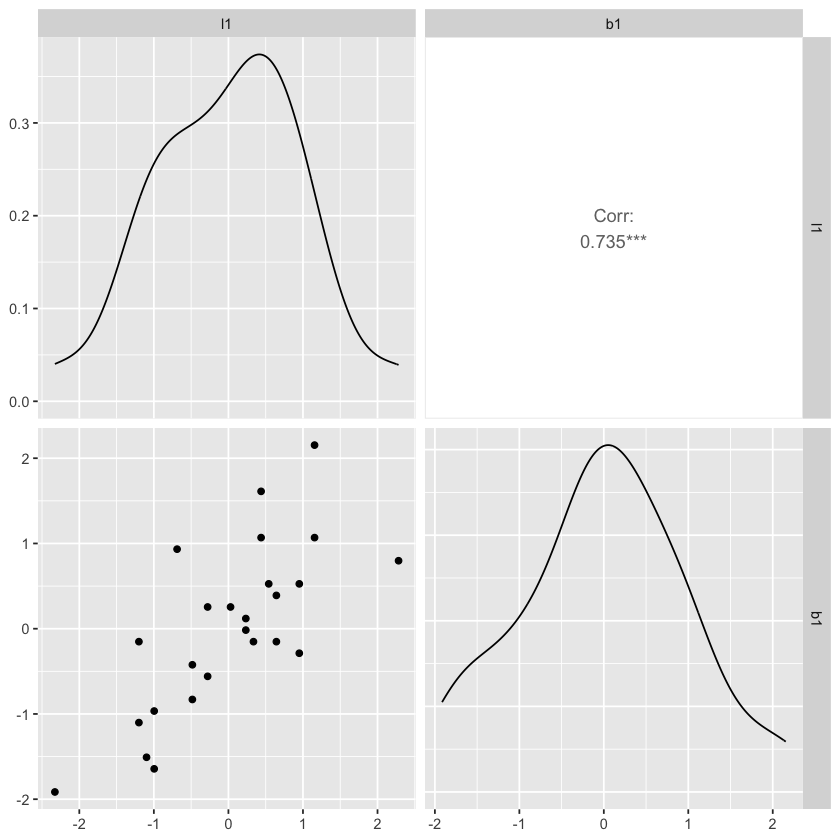

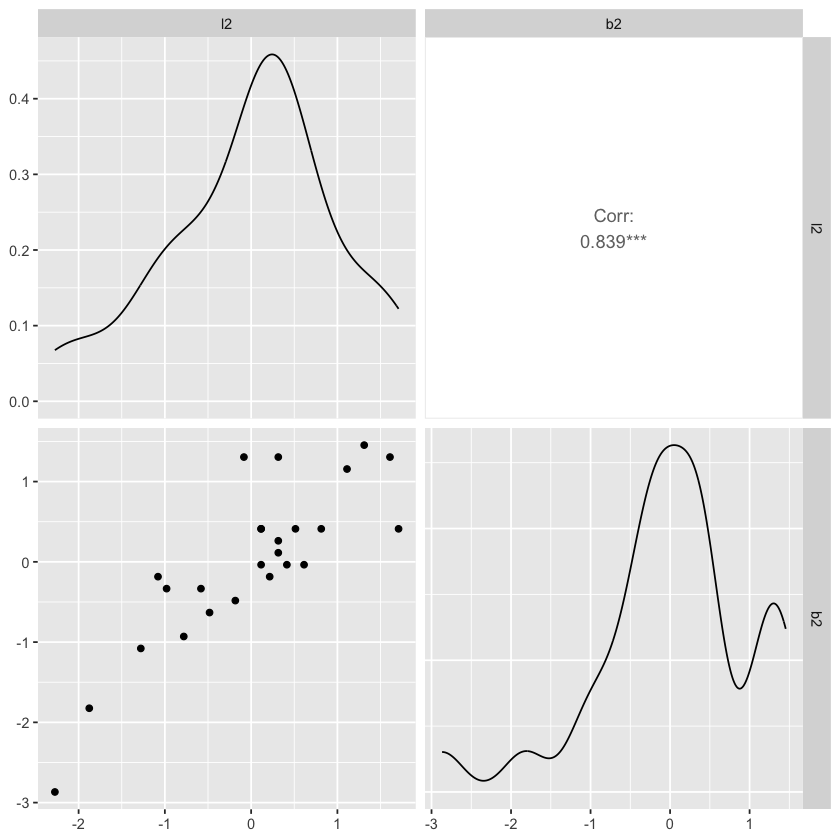

In [85]:
# Slide 45:
brother1<-frets2[,1:2]
brother2<-frets2[,3:4]

round(cov(brother1,brother2),digits=2)

library(GGally)

ggpairs(brother1)
ggpairs(brother2)

In [86]:
# # Slide 46:
# install.packages("CCA")
# library(CCA)

# my.cca<-cc(brother1,brother2)

# # The A matrix:
# (A<-my.cca$xcoef)


# # The B matrix:
# (B<-my.cca$ycoef)

# # canonincal correlations:

# my.cca$cor

# # note:
# round(t(A)%*%cor(brother1)%*%A,digits=2)

# round(t(B)%*%cor(brother2)%*%B,digits=2)

In [87]:
# # Slide 47:

# # Canonical variables values for each observation.
# my.cca$scores$xscores[1:4,]   #V_1, V_2
# my.cca$scores$yscores[1:4,]   #W_1, W_2

# par(mfrow=c(1,2))

# plot(my.cca$scores$xscores[,1], my.cca$scores$yscores[,1],pch=19,
#      main="Girth brother 2 vs brother 1, cor(V1, W1)=0.7885",
#      xlab='Girth brother 1',ylab='Girth brother 2')
# plot(my.cca$scores$xscores[,2], my.cca$scores$yscores[,2], pch=19,
#      main="Shape brother 1 vs shape brother 2, cor(V2, W2)=0.0537",
#      xlab='Shape brother 1',ylab='Shape brother 2')
# par(mfrow=c(1,1))

In [88]:
# # Slide 48:

# #Correlation between variables:

# my.cca$scores$corr.X.xscores  #(l1, b1) (V_1, V_2)
# my.cca$scores$corr.X.yscores  #(l1, b1) (W_1, W_2)

# my.cca$scores$corr.Y.xscores  #(l2, b2) (V_1, V_2)
# my.cca$scores$corr.Y.yscores  #(l2, b2) (W_1, W_2)

# # note:
# cor(brother2)%*%B

In [89]:
# # Slide 49:


# #Test of hypothesis for the canonical dimensions
# # rho: canonical correlations

# (rho<-my.cca$cor)

# (n<-dim(frets2)[1])    # number of observations
# (p<-dim(brother1)[2]) # number of variables in the first set of variables
# (q<-dim(brother2)[2]) ## number of variables in the second set of variables

# #Compute p-values using the F-approximations
# # for different test statistics.
# ?p.asym
# (HypTest<-p.asym(rho,n,p,q, tstat="Wilks"))

# # Standardization of brother1's canonical coefficients
# # is not necessary, since we work with correlations 

# ####------
# #  Notice that eigen(invE%*%H) are equal to rho^2/(1-rho^2)
# # (see proof of Theorem 6.16 on p 390 of the book)
# (aux<-(rho^2/(1-rho^2))) 
# (VarPerc<- aux/sum(aux))
# (VarCum<- cumsum(VarPerc))

# #------------

# Results <- data.frame("CanCor" = rho,
#                       "Squared CanCor" = rho^2,
#                       "eigenvaluesInvEH"=aux,
#                       "proportion"=VarPerc, 
#                       "cumulative" = VarCum,
#                       HypTest)

# Results

```R Libary(CCA)``` do not work, so use:

In [90]:
# --- Slide 46: Canonical correlation without packages (CCA-like shim) ---

# Fit canonical correlation with base R
my.cca <- cancor(brother1, brother2)

# Coefficient matrices (match CCA::cc naming)
A <- my.cca$xcoef
B <- my.cca$ycoef

# Canonical correlations
my.cca$cor

# Checks (A' R_xx A ≈ I, B' R_yy B ≈ I, and cross-cov ≈ diag(cor))
Rx  <- cov(brother1)
Ry  <- cov(brother2)
Rxy <- cov(brother1, brother2)

round(t(A) %*% Rx %*% A, 2)
round(t(B) %*% Ry %*% B, 2)
round(t(A) %*% Rxy %*% B, 2)

# --- Build the CCA-like $scores list so your later code works unchanged ---

# Canonical variates (scores)
xscores <- as.matrix(brother1) %*% A   # U
yscores <- as.matrix(brother2) %*% B   # V
colnames(xscores) <- paste0("V", seq_len(ncol(xscores)))
colnames(yscores) <- paste0("W", seq_len(ncol(yscores)))

# Structure correlations (variables with canonical variates)
corr.X.xscores <- cor(brother1, xscores)
corr.X.yscores <- cor(brother1, yscores)
corr.Y.xscores <- cor(brother2, xscores)
corr.Y.yscores <- cor(brother2, yscores)

# Attach to my.cca to mimic CCA::cc output layout
my.cca$scores <- list(
  xscores = xscores,
  yscores = yscores,
  corr.X.xscores = corr.X.xscores,
  corr.X.yscores = corr.X.yscores,
  corr.Y.xscores = corr.Y.xscores,
  corr.Y.yscores = corr.Y.yscores
)

[1] 0.7885079 0.0537397

0.04,0.00
0.00,0.04


0.04,0.00
0.00,0.04


0.03,0
0.00,0


V1,V2
0.116989348,-0.002793012
0.076540882,-0.346044498
-0.099549581,0.015795289
-0.004261052,0.149456969


W1,W2
-0.119069114,-0.05280248
0.221184190,-0.46935244
0.007966565,-0.05454844
0.038733747,-0.16241658


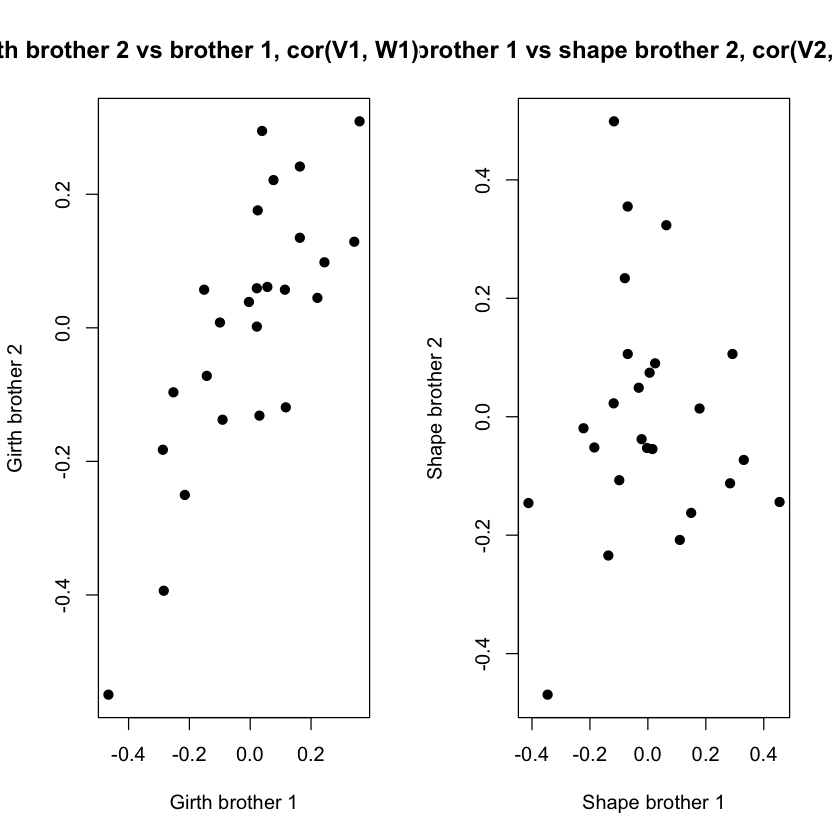

In [91]:
# --- Slide 47: Use the same code style you had ---

# Canonical variables values for each observation.
my.cca$scores$xscores[1:4, ]   # V_1, V_2
my.cca$scores$yscores[1:4, ]   # W_1, W_2

par(mfrow = c(1, 2))
# Compute correlations dynamically so titles are always correct
r1 <- cor(my.cca$scores$xscores[, 1], my.cca$scores$yscores[, 1])
r2 <- cor(my.cca$scores$xscores[, 2], my.cca$scores$yscores[, 2])

plot(my.cca$scores$xscores[, 1], my.cca$scores$yscores[, 1], pch = 19,
     main = paste0("Girth brother 2 vs brother 1, cor(V1, W1)=", round(r1, 4)),
     xlab = 'Girth brother 1', ylab = 'Girth brother 2')

plot(my.cca$scores$xscores[, 2], my.cca$scores$yscores[, 2], pch = 19,
     main = paste0("Shape brother 1 vs shape brother 2, cor(V2, W2)=", round(r2, 4)),
     xlab = 'Shape brother 1', ylab = 'Shape brother 2')
par(mfrow = c(1, 1))

In [92]:
# --- Slide 48: Correlations between variables and canonical variates ---

my.cca$scores$corr.X.xscores  # (l1, b1) with (V_1, V_2)
my.cca$scores$corr.X.yscores  # (l1, b1) with (W_1, W_2)

my.cca$scores$corr.Y.xscores  # (l2, b2) with (V_1, V_2)
my.cca$scores$corr.Y.yscores  # (l2, b2) with (W_1, W_2)

# Note: sample check consistent with your slide
cor(brother2) %*% B

,V1,V2
l1,0.9352877,-0.3538884
b1,0.9271512,0.3746875


,W1,W2
l1,0.7374817,-0.01901786
b1,0.7310660,0.02013559


,V1,V2
l2,0.7539771,-0.01572908
b2,0.7582663,0.01474027


,W1,W2
l2,0.9562074,-0.2926900
b2,0.9616470,0.2742901


l2,0.1951850,-0.05974510
b2,0.1962954,0.05598924


In [93]:
# ---Slide 49 — canonical tests without CCP ---

# Inputs assumed already defined from earlier slides:
# my.cca (from cancor), brother1, brother2

# Canonical correlations
rho <- my.cca$cor

# Dimensions
n <- nrow(brother1)         # number of observations
p <- ncol(brother1)         # variables in set X
q <- ncol(brother2)         # variables in set Y
m <- min(p, q)              # number of canonical dimensions

# ---- Wilks' Lambda sequential tests with Bartlett's chi-square approximation ----
# H0_k: last (m - k + 1) canonical correlations are zero (k = 1..m)

wilks_bartlett <- function(rho, n, p, q) {
  m <- min(p, q)
  out <- vector("list", m)
  for (k in 1:m) {
    # product over remaining roots (k..m)
    Lambda_k <- prod(1 - rho[k:m]^2)
    # Bartlett's chi-square approximation
    # df for the k-th step:
    df_k <- (p - k + 1) * (q - k + 1)
    # effective sample size adjustment
    t_k <- n - 1 - (p + q + 1) / 2
    # statistic
    X2_k <- -t_k * log(Lambda_k)
    pval_k <- pchisq(X2_k, df = df_k, lower.tail = FALSE)
    out[[k]] <- data.frame(
      step = k,
      WilksLambda = Lambda_k,
      df = df_k,
      ChiSq = X2_k,
      p_value = pval_k
    )
  }
  do.call(rbind, out)
}

HypTest <- wilks_bartlett(rho, n, p, q)
HypTest


step,WilksLambda,df,ChiSq,p_value
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3771629,4,20.96417998,0.0003218897
2,0.9971120,1,0.06218088,0.8030815916
